In [2]:
import numpy as np
import matplotlib.pyplot as plt

## the problem

We observe some bacterial mutation times. We would like to use this data to infer whether these bacteria all share a single mutational time constant $\lambda$ ($H_1$), or if there are two types of bacteria, each with their own distinct mutational time constants $\lambda_1$ and $\lambda_2$ ($H_2$).

Fortunately, there's a nice framework for model comparison that we went through lecture this week that will let us tackle this problem, by computing the following ratio:

$$\frac{P(H_1 \mid D)}{P(H_2 \mid D)} $$

If this term is close to 1, then both hypotheses are about equally plausible. If it is much larger than 1, $H_1$ is more likely to underly the data than $H_2$, and so on.

Before we get there, let's take a look at the class data and get a feel for what the problem will look like. On the homework you will use a personalized dataset of mutation times.

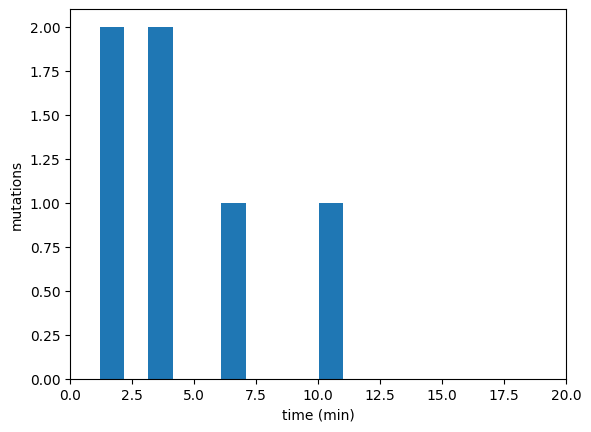

In [3]:
class_data = np.array([1.2, 2.1, 3.4, 4.1, 7, 11])

plt.figure()
plt.hist(class_data)
plt.xlim(0, 20)
plt.xlabel('time (min)')
plt.ylabel('mutations')
plt.show()

In this problem we assume that the probability that a bacterium mutates follows an exponential decay, which is parameterized by a mutation rate $\lambda$, i.e.

$$P(\mathrm{observing~mutation~at~}t \mid \lambda) \propto e^{-t/\lambda}$$

Let's just plot this for different $\lambda$'s to get a sense.

If we overlaid the data, what would you guess $\lambda$ is, roughly?

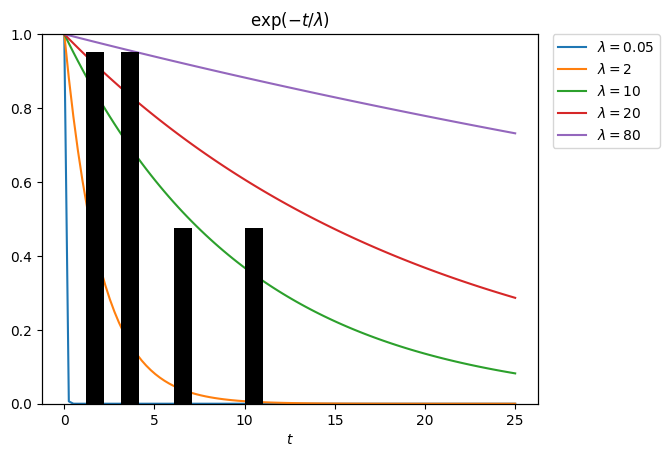

In [15]:
ts = np.linspace(0, 25, 100)
lams = [0.05, 2,10, 20, 80]
fig, ax1 = plt.subplots()
for lam in lams:
  ax1.plot(ts, np.exp(-ts/lam), label=r'$\lambda = $'+f'{lam}')

ax2 = ax1.twinx()
ax2.hist(class_data, density=True, color='k', label='class data')
ax1.legend(loc='upper left', bbox_to_anchor=(1.03, 1), borderaxespad=0)
ax1.set_xlabel('$t$')
plt.title('$\exp(-t/\lambda)$')
ax1.set_ylim(0, 1)
ax2.set_yticks([])
plt.show()

Back to the problem. We will be comparing the evidence for $H_1$ to the evidence for $H_2$:

$$\frac{P(H_1 \mid D)}{P(H_2 \mid D)} = \frac{P(D \mid H_1)P(H_1)}{P(D \mid H_2)P(H_2)} $$

If we assume a uniform prior over hypotheses, $P(H_1) = P(H_2)$, then

$$\begin{aligned}
\frac{P(H_1 \mid D)}{P(H_2 \mid D)} &= \frac{P(D \mid H_1)}{P(D \mid H_2)} \\
&= \frac{\int_\lambda P(D \mid \lambda, H_1) P(\lambda \mid H_1) d\lambda}{ \int_{\lambda_1} \int_{\lambda_2} P(D \mid \lambda_1, \lambda_2, H_2) P(\lambda_1, \lambda_2 \mid H_2) d\lambda_1 d\lambda_2  }
\end{aligned}$$

In this second step, we are marginalizing the numerator over the possible values of $\lambda$, and the denominator by the possible values of $\lambda_1$ and $\lambda_2$.

Now let's go through the numerator, which represents the evidence for $H_1$, and the denominator, the evidence for $H_2$ separately.

## $H_1$: One mutation time constant $\lambda$

For a single bacterium, the probability for a bacterium to wait time $t$ before mutating follows an exponential decay:

$$P(t \mid \lambda, H_1) \propto e^{-t/\lambda} = c e^{-t/\lambda} $$

To get a formal probability (and not just proportionality) that properly sums to 1 over all times (we consider a fixed interval $t_-$ to $t_+$), let's figure out what that normalization term $c$ must be.

$$\int_{t_-}^{t_+} P(t \mid \lambda, H_1) = 1 \implies \int_{t_-}^{t_+} ce^{-t/\lambda} = 1 \implies c = \frac{1}{\int_{t_-}^{t_+} e^{-t/\lambda} dt}$$

So, for a single bacterium:

$$\begin{aligned}
P(t \mid \lambda, H_1) &= \frac{e^{-t/\lambda}}{\int_{t_-}^{t_+} e^{-t/\lambda} dt} \\
&= \frac{e^{-t/\lambda}}{Z(\lambda)}
\end{aligned}$$


We'll call that denominator $Z(\lambda)$, as seen in class. It is a function of $\lambda$:

$$\begin{aligned}
Z(\lambda) &= \int_{t_-}^{t_+} e^{-t/\lambda} dt \\
&= -\lambda \big(e^{-t_+/\lambda} - e^{-t_-/\lambda} \big) \\
&= \lambda \big(e^{-t_-/\lambda} - e^{-t_+/\lambda} \big)
\end{aligned}$$



The data we have consists of multiple observed mutation times. We thus need the joint probability over our individual data points:
$$\begin{aligned}
P(D\mid \lambda, H_1) &= \prod_{i=1}^N P(t_i \mid \lambda, H_1) \\
&= \prod_{i=1}^N \frac{e^{-t_i/\lambda}}{Z(\lambda)} \\
&= \frac{e^{-\sum_i t_i/\lambda}}{[Z(\lambda)]^N}  \\
\end{aligned}$$

We're almost there for the numerator! Now we need to specify $P(\lambda \mid H_1)$.

We ask you to assume a uniform prior for $\lambda$ within a (specified by the homework) interval, $\lambda_-$ to $\lambda_+$:

$$
P(\lambda\mid H_1) = \left\{
  \begin{array}{ll}
  \frac{1}{\lambda^{+}-\lambda^{-}} = \frac{1}{\sigma} & \lambda^{-}\leq\lambda\leq\lambda^{+}\\
  0                                                    & \mbox{otherwise}
  \end{array}
  \right.
$$

So,
$$
\begin{aligned}
  P(D\mid H_1)
    &= \int_{\lambda} P(D\mid \lambda, H_1) P(\lambda\mid H_1)\, d\lambda\\
    &= \int_{\lambda^-}^{\lambda^+} \frac{e^{-\sum_i t_i/\lambda}}{Z^N(\lambda)} \frac{1}{\lambda^{+}-\lambda^{-}}\, d\lambda\\
    &= \frac{1}{\sigma}\int_{\lambda^-}^{\lambda^+} \frac{e^{-\sum_i t_i/\lambda}}{Z^N(\lambda)}\, d\lambda.
  \end{aligned}
  $$


## $H_2$: Two mutation time constants $\lambda_1$, $\lambda_2$

Now we specify our second hypothesis, that there are two populations of bacteria, each with a distinct mutation rate, either $\lambda_1$ or $\lambda_2$. The fraction of bacteria with rate $\lambda_1$ is $\eta$.

So, we have a mixture of terms:

$$
  P(t\mid \lambda_1,\lambda_2, H_2) =
  \eta \frac{e^{-t/\lambda_1}}{Z(\lambda_1)} + (1-\eta) \frac{e^{-t/\lambda_2}}{Z(\lambda_2)}
$$

Let's see what this hypothesis describes with code:




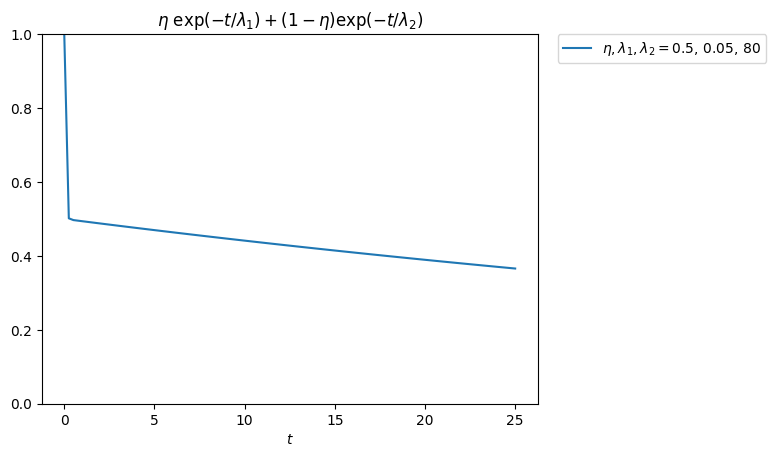

In [5]:
lam1 = 0.05
lam2 = 80
eta = 0.5

plt.figure()
plt.plot(ts, eta*np.exp(-ts/lam1) + (1-eta)*np.exp(-ts/lam2),
         label=r'$\eta, \lambda_1, \lambda_2 = $'+f'{eta}, {lam1}, {lam2}')
plt.title('$\eta ~\exp(-t/\lambda_1) + (1-\eta) \exp(-t/\lambda_2)$')
plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.xlabel('$t$')
plt.ylim(0, 1)
plt.show()

Q: What happens if $\lambda_1$ and $\lambda_2$ are very close to each other? What is the utility of $H_2$ in this case over $H_1$?

Now let's compute the evidence,

$$ P(D \mid H_2) = \int_{\lambda_1} \int_{\lambda_2} P(D \mid \lambda_1, \lambda_2, H_2) P(\lambda_1, \lambda_2 \mid H_2) d\lambda_1 d\lambda_2 $$

Let's first get the first term:

$$
\begin{aligned}
  P(D \mid \lambda_1, \lambda_2, H_2)
    &= \prod_{i=1}^N P(t_i\mid \lambda_1,\lambda_2, H_2) \\
    &= \prod_{i=1}^N \bigg[ \eta \frac{e^{-t_i/\lambda_1}}{Z(\lambda_1)} + (1-\eta) \frac{e^{-t_i/\lambda_2}}{Z(\lambda_2)} \bigg]
  \end{aligned}
  $$

And for the prior on $\lambda_1$ and $\lambda_2$, we will consider uniform distributions between $[\lambda_1^-, \lambda_1^+)$ and $[\lambda_2^-, \lambda_2^+)$, respectively.

$$\begin{aligned}
    P(D\mid H_2)
    &= \int_{\lambda_1}\int_{\lambda_2}
    P(D\mid \lambda_1,\lambda_2, H_2) P(\lambda_1,\lambda_2\mid H_2)\, d\lambda_1 d\lambda_2\\
    &= \int_{\lambda_1^-}^{\lambda_1^+}\int_{\lambda_2^-}^{\lambda_2^+}
    \prod_i \left[\eta \frac{e^{-t_i/\lambda_1}}{Z(\lambda_1)} + (1-\eta) \frac{e^{-t_i/\lambda_2}}{Z(\lambda_2)} \right]
    \frac{1}{\lambda_1^{+}-\lambda_1^{-}}\frac{1}{\lambda_2^{+}-\lambda_2^{-}}\, d\lambda_1 d\lambda_2\\
    &= \frac{1}{\sigma_{1}\sigma_{2}}\int_{\lambda_1^-}^{\lambda_1^+}\int_{\lambda_2^-}^{\lambda_2^+}
    \prod_i \left[\eta \frac{e^{-t_i/\lambda_1}}{Z(\lambda_1)} + (1-\eta) \frac{e^{- t_i/\lambda_2}}{Z(\lambda_2)} \right] d\lambda_1 d\lambda_2
 \end{aligned}$$

 There we have it! We have all we need to compute

 $$\frac{P(H_1 \mid D)}{P(H_2 \mid D)} $$

## Probabilities can be very small numbers


Calculating the probability of some data given a model, usually requires
multiplying many different probably terms

$$
P(D\mid M) = \prod_{i=1}^N P(d_i\mid M).
$$

This quantity easily underflows, which means that you are trying to
calculate something smaller than the precision of your computer.

If you had a data set $D$, in which each individual
datum had probability of the order of $0.001$ (which is not such
small quantity), then the probability of all the data is

$$
P(D) = \left(10^{-3}\right)^{N} = 10^{-3*N}.
$$

In [7]:
## see for yourself!

10**(-323), 10**(-324)

(1e-323, 0.0)

## The smallest double-precision floting point number,

$$
\mbox{smallest number} \sim 10^{-323}
$$

which means that after $N\sim 100$ data points,

$$
P(N=100) = 10^{-300}
$$

Has become so small that you would not be able to distinguish having a
data set with $N=100$ measurements from having another with $N=200$ points. In other words when we go and try to calculate said probabiliy we are going to end up with 0 instead of what we know it to actually be: a really, really small number.

**How do we get around this?**

### Working in log space

Working with the log of the probability can be very useful to avoid underflow problems. Because it expands the dynamic range of the probability effectively giving you access to those small numbers that you couldn't calculate before. Also, because the logarithm of the probability is monotonically increasing, maximizing the probability and the logarithm of the probability is the same task.

But working in log-space can be helpful in many ways, let's go back to our example:

$$
\log P(D\mid M) = \log \prod_{i=1}^N P(d_i\mid M) = \sum_{i=1}^N \log P(d_i\mid M).
$$

If you are having trouble seeing why this is the case remember that it is a property of logarithms that $log(a_1a_2) = log(a_1) + log(a_2)$. Convince yourself that this extends to N elements, $log(a_1a_2...a_N) = log(a_1) + log(a_2) + ...+ log(a_N)$ when you are sold, it is trivial to see that $log(a_1a_2...a_N) = \sum_{i=1}^N \log(a_i)$.


If we go back to the previous example:

$$
\log P(N=100) = -300 * \log(10) = -690.776
$$

but

$$
\log P(N=200) = -600 * \log(10) = -1382.551
$$

thus, the two cases are easily distinguishable in log space.

$$
\log P(N=200) - \log P(N=100) = -691.775
$$

or

$$
P(N=200) =  e^{-691.775} P(N=100)
$$

In [8]:
np.log(np.exp(1000)+np.exp(999))

<ipython-input-8-591ffdc15029>:1: RuntimeWarning: overflow encountered in exp
  np.log(np.exp(1000)+np.exp(999))


inf

Sometimes you describe your system with a mixture of probability
distributions. For instance like mixture of Gaussian distributions, or
like in the case of our [homework this week](http://mcb111.org/w03/w03-homework.html) a mixture of
exponential distributions.

Now we work in log space so you have, so you end up having to do the following
calculation $\log(e^a + e^b)$

If $a$ and $b$ are large and negative (as it is the case when they represent log probabilities), then that calculation cannot be directly. For instance, a naive calculation of $log(e^{-1000} + e^{-999})$ will give you -infinity. And if we tried with positive number, for instance $log(e^{1000} + e^{999})$ will give you +infinity.

The way to do this calculation robustly is as follows, assume $a > b$, then

$$
\log(e^a + e^b) = \log \left(e^a ( 1 + e^{b-a})\right) = a + \log\left( 1 + e^{b-a}\right)
$$

since $b-a <0$, the exponential $ e^{b-a}<=1$ never becomes a
large number, and the calculation is robust.

Then you will calculate

$$
log(e^{-1000} + e^{-999}) = -999 + \log(1+e^{-1}) = -999 + 0.31 = - 998.69,
$$

and

$$
log(e^{1000} + e^{999}) = 1000 + \log(1+e^{-1}) = 1000 + 0.31 = 1000.31,
$$


The log-sum-exp trick can be generalized for an arbitrary number of terms $$n$$

$$
\log(e^{a_1} + \ldots + e^{a_n}) =  a_{max} + \log\left(1+\sum_{i=1}^ne^{(a_i - a_{max})}\right),
$$

where $a_{max}$ is the maximum value of the set $\{a_1,\ldots, a_n\}$.

In [9]:
from scipy.special import logsumexp
?logsumexp

In [ ]:
import numpy as np
np.logaddexp?

# How to integrate?

We want to find the Area under the curves!


In [10]:
xs = np.linspace(0,1,int(1e7)) # define bins
dx = xs[1]-xs[0] # width of a bin

In [ ]:
xs #see what our bin list looks like

array([0.0000000e+00, 1.0000001e-07, 2.0000002e-07, ..., 9.9999980e-01,
       9.9999990e-01, 1.0000000e+00])

In [18]:
def g(x): # a function to integrate
    return x

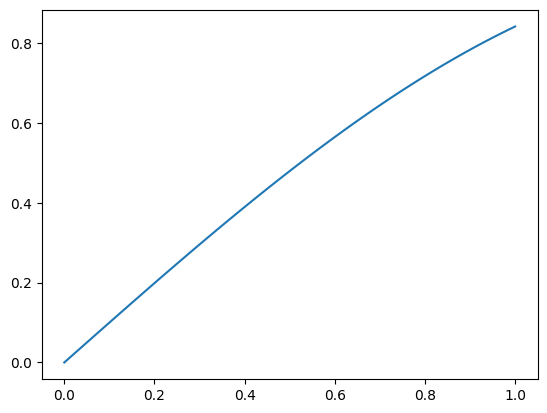

In [17]:
plt.step(xs,g(xs))

In [ ]:
%%time
bin_vals = []
for x in xs: # For every value in our list of bins get the area of the particular bin by multiplying the height at that point by the width of the bin.
    bin_vals.append(x*dx)

print(np.sum(bin_vals)) # sum up all the areas.

0.5000000500000026
CPU times: user 3.93 s, sys: 242 ms, total: 4.17 s
Wall time: 4.17 s


In [ ]:
%%time
np.sum(g(xs)*dx) # numpy broadcasting Vector, we do the operation to ever entry on the array and sum the entries

CPU times: user 27.1 ms, sys: 1.86 ms, total: 29 ms
Wall time: 31.4 ms


0.5000000500000026

In [ ]:
def g(x): #Another function to integrate.
    return x**2

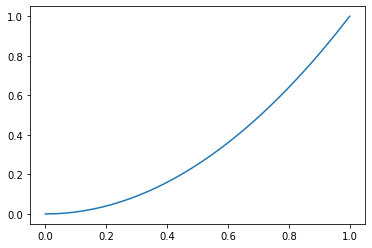

In [ ]:
plt.step(xs,g(xs))

In [19]:
%%time
bin_vals = []
for x in xs:  # For every value in our list of bins get the area of the particular bin by multiplying the height at that point by the width of the bin.
    bin_vals.append(x**2 * dx)

np.sum(bin_vals) # sum up all the areas.

CPU times: user 4.19 s, sys: 549 ms, total: 4.73 s
Wall time: 4.73 s


0.3333333833333404

In [20]:
%%time
np.sum(xs**2*dx) # numpy broadcasting Vector, we do the operation to ever entry on the array and sum the entries

CPU times: user 33.6 ms, sys: 35.7 ms, total: 69.3 ms
Wall time: 100 ms


0.3333333833333404

### But what about higher dimensional integrals?

$$\int \int (x^2-y^2) dxdy$$

We don't want the area under the curve, we want the volume under the surface!

In [ ]:
xs = np.linspace(0,1,10) # define bins
ys = np.linspace(0,1,10) # define bins
dx = xs[1]- xs[0] # width of a bin
dy = ys[1]- ys[0] # width of a bin

In [ ]:
%%time
int_value = 0
bin_vals_x = []
for x in xs: # For every value in our list of bins in one axis
    bin_vals_y = []
    for y in ys: # For every value in our list of bins in  the other axis
        bin_vals_y.append((x**2-y**2)*dx*dy) #updating lists
        int_value += (x**2-y**2)*dx*dy # Summing the entry ar every step
    bin_vals_x.append(bin_vals_y)
bin_vals_x = np.array(bin_vals_x) #create surface array
print(int_value) #value of the integral

-1.5178830414797062e-17
CPU times: user 640 µs, sys: 985 µs, total: 1.63 ms
Wall time: 1.78 ms


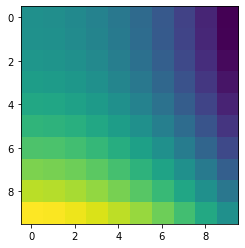

In [ ]:
plt.imshow(bin_vals_x)

In [ ]:
%%time
surf = xs[:,np.newaxis]**2 - ys**2 # Numpy broadcasting method of integrating with two axis.

CPU times: user 56 µs, sys: 7 µs, total: 63 µs
Wall time: 67.5 µs


**Try** it yourself:

- What does the silcing `[:, np.newaxis]` do to the numpy array being sliced?
- How does the operation propagate?

In [ ]:
(ys**2)[:,np.newaxis] - xs**2

array([[ 0.        , -0.01234568, -0.04938272, -0.11111111, -0.19753086,
        -0.30864198, -0.44444444, -0.60493827, -0.79012346, -1.        ],
       [ 0.01234568,  0.        , -0.03703704, -0.09876543, -0.18518519,
        -0.2962963 , -0.43209877, -0.59259259, -0.77777778, -0.98765432],
       [ 0.04938272,  0.03703704,  0.        , -0.0617284 , -0.14814815,
        -0.25925926, -0.39506173, -0.55555556, -0.74074074, -0.95061728],
       [ 0.11111111,  0.09876543,  0.0617284 ,  0.        , -0.08641975,
        -0.19753086, -0.33333333, -0.49382716, -0.67901235, -0.88888889],
       [ 0.19753086,  0.18518519,  0.14814815,  0.08641975,  0.        ,
        -0.11111111, -0.24691358, -0.40740741, -0.59259259, -0.80246914],
       [ 0.30864198,  0.2962963 ,  0.25925926,  0.19753086,  0.11111111,
         0.        , -0.13580247, -0.2962963 , -0.48148148, -0.69135802],
       [ 0.44444444,  0.43209877,  0.39506173,  0.33333333,  0.24691358,
         0.13580247,  0.        , -0.16049383

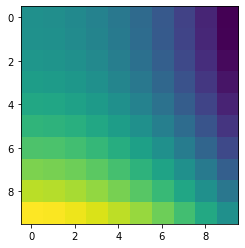

In [ ]:
plt.imshow(surf)

### Don't know where to start with the homework! Or getting confused with the `log` computations?

Try starting here

In [14]:
def Z(lam, tmin, tmax):
  return lam * (np.exp(-tmin/lam) - np.exp(-tmax/lam))

## TODO for you, for homework
## Use logs to compute the integrals!
def logZ(lam, tmin, tmax):
    return -1

# check if similar:
np.isclose(Z(3, 0.05, 80), np.exp(logZ(3, 0.05, 80)))

False